<link rel='stylesheet' href='../assets/css/main.css'/>

[<< back to main index](../README.md)

# Linear Regression in PySpark (Demo)

### Overview
Instructor to demo this on screen.
 
### Builds on
None

### Run time
approx. 20-30 minutes

### Notes

PySpark has a class called Linear Regression that can be used to do simple linear regression models.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
print('Spark UI running on http://YOURIPADDRESS:' + sc.uiWebUrl.split(':')[2])

## Example : Tips
Here is our tip data.  This shows 10 observations of bill with tip amounts.

| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 

## Step 1: Let's create a Pandas dataframe with the data

Note that pandas dataframes are not the same as spark dataframes.  However, Pandas dataframes are ubiquitous in python (for small datasets) and are a nifty way to ensure that we have our data's schema match perfectly.

In [2]:
tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })

tip_data


,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


## Step 2: Let's do a quick plot of the data

Let us use matplotlib to do a quick scatter plot of the data. Note that this is not a Spark dataframe, this is using the pandas dataframe.

**=>TODO: plot the bill (X-axis), versus the tip (Y-axis)**

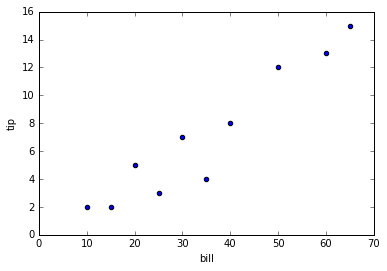

In [3]:
plt.scatter(tip_data.???, tip_data.???)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()

## Step 3: Create a Spark Dataframe

Let's now take our pandas dataframe and make a spark dataframe out of it.

**=>TODO: load the pandas dataframe tip_data into a spark dataframe spark_tips **

In [ ]:
spark_tips = spark.createDataFrame(???)
spark_tips.show()

## Step 4: Create a Features column with the Vector

We need to create a feature vector here.  You might wonder why we need a "vector" after all there's only one variable: "bill."  Nonetheless, we still need the dataframe to have a column called "features" of type Vector Double).

Luckily, there's a handy class called VectorAssembler that does this for us.

**=>TODO: build a vector from the input column "bill"**

In [ ]:
assembler = VectorAssembler(inputCols=[???], outputCol="features")
featureVector = assembler.transform(spark_tips)

featureVector.show()


## Step 5: Create a Label column with the Vector

We need a way to have the outcome variable.  In this case, we are trying to predict the tip from the bill.  So, we need to signal to Spark MLlib which one is the outcome variable.  In this case, we'll create a new variable called label.  Since we already have that, we can just rename the "tip" column as the "label".

**=>TODO: rename variable "tip" as "label" **

In [ ]:
featureVector = featureVector.withColumnRenamed("tip", "???")
featureVector.show()


## Step 6: Run Linear Regression in Spark

Let's run our linear regression.  To do this we need to run call the LinearRegression Classs

In [ ]:
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(featureVector)


intercept = lrModel.intercept  # This is the intercept
slope = lrModel.coefficients[0] #This is the slope

## Step 7: Plot the fit line (abline)

**=>TODO: Do a scatterplot of bill versus tip **
**=>TODO: rename variable "tip" as "label" **

In [ ]:
# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in tip_data.bill]

# Plot the best fit line over the actual values
plt.scatter(tip_data.???, tip_data.???)
plt.plot(tip_data.bill, abline_values, 'b')
plt.ylabel('tip')
plt.xlabel('bill')
plt.title("Fit Line")
plt.show()

## Step 8: Print out the Outputs

Here is a sample output:

In [ ]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients[0]))
print("Intercept: %s" % str(lrModel.intercept))


# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


## Step 9: Plot the residuals

Residuals are the error, or difference between the model predicted and model actual.  We'd like these to be as small as possible, with residuals roughly balanced.   We don't want a model that consistently predicts values too high or too low.

**=>TODO: do a plot of the bill (x-value) versus residuals (y-value) **

In [ ]:
residuals = lrModel.summary.residuals.toPandas()
plt.scatter(tip_data.???, residuals['residuals'])
plt.axhline(y=0, color='r', linestyle='-')  # horizon
plt.ylabel('Residuals')
plt.xlabel('bill')
plt.title("Residuals")
plt.show()




## Step 10 : Identify Coefficients

### Intercept and Slope
We can see them from output

Coefficients:
            Estimate 
(Intercept) -0.8217112049846651
bill        0.226334605857

- **Slope** (of line) : ** 0.226334605857**
- **Intercept** (where line meets Y-axis) : **-0.8217112049846651**  (below zero line)

We can also get these programatically.  
If `tip = a * amount + b`

In [ ]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients[0]))
print("Intercept: %s" % str(lrModel.intercept))

a = lrModel.coefficients[0]
b = lrModel.intercept

intercept = lrModel.intercept
slope = lrModel.coefficients[0]

### Correlation Coefficient (r)
Correlation Coefficient (r) denotes how strongly X & Y are inter-related.  

Spark ML can create a correlation Matrix which shows how all the variables in the dataset are correlated, if at all.  Naturally, every variable will have a correlation of 1 when compared to itself.


In [ ]:
from pyspark.ml.stat import Correlation

assembler = VectorAssembler(inputCols=["bill", "tip"], outputCol="features")
correlationVector = assembler.transform(spark_tips)

r1 = Correlation.corr(correlationVector, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))


**==>  Question : Does bill amount influence tip amount? (are they strongly linked?) **


## Coefficient of Determination (r&sup2;)

In [ ]:
# coefficient.of.determination (r^2) 
rsquared = lrModel.summary.r2
# 0.9067141

**==>  Question : What does r&sup2; tells us? **

## Step 11: Calculate tip for $100 bill

**=>TODO: perform the calculation for tip_for_100 using a,b coefficients **

In [ ]:
tip_for_100 = ???   
print(tip_for_100)


## Step 12: Add a estimated_tip column to pandas and spark dataframe

**=>TODO: create a new pandas column called est_tip **

In [ ]:
tip_data['est_tip'] =  ???

tip_data

### Add estimated tip column to pyspark dataframe

This is a bit tricky. We need to use the sql expr function to make this work.

The formula: (bill * a) + b

**=>TODO: take formula and create new spark column called est_tip **


In [ ]:
from pyspark.sql.functions import expr

formula = "(bill * " + str(a) + ") + " + str(b)

print(formula)
## Step 6: Add estimated tip column to spark dataframe
spark_tips_with_est = spark_tips.withColumn("est_tip", expr(???))
spark_tips_with_est.show()

## Step 13: Perform a prediction


Let's try to run a prediction on some data: $45.00, $55.00, and $65.00 


**=>TODO: use model to transform dataframe with feature vectors to make predictions **

In [ ]:
test_data_pd = pd.DataFrame({'bill' : [45., 55., 65.],
             })
test_data_spark =  spark.createDataFrame(test_data_pd)
test_assembler = VectorAssembler(inputCols=["bill"], outputCol="features")
test_features = test_assembler.transform(test_data_spark)


test_predictions = lrModel.transform(???)

test_predictions.show()

## Step 13: Complete Code
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import expr


# tip = a * amount + b

# Make a Pandas dataframe
tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })
                       
print(tip_data)

#Plot the Tip Data
plt.scatter(tip_data.bill, tip_data.tip)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()


# Create a Spark Dataframe
spark_tips = spark.createDataFrame(tip_data)
spark_tips.show()

# Create a Features Columns
assembler = VectorAssembler(inputCols=["bill"], outputCol="features")
featureVector = assembler.transform(spark_tips)

featureVector.show()

# Create the label column
featureVector = featureVector.withColumnRenamed("tip", "label")
featureVector.show()

# Run Linear Regression

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(featureVector)


intercept = lrModel.intercept  # This is the intercept
slope = lrModel.coefficients[0] #This is the slope

# Plot the best fit line over the actual values
abline_values = [slope * i + intercept for i in tip_data.bill]
plt.scatter(tip_data.bill, tip_data.tip)
plt.plot(tip_data.bill, abline_values, 'b')
plt.ylabel('tip')
plt.xlabel('bill')
plt.title("Fit Line")
plt.show()

# Summarize the model over the training set and print out some metrics
print("Coefficients: %s" % str(lrModel.coefficients[0]))
print("Intercept: %s" % str(lrModel.intercept))
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

#Plot Residuals
residuals = lrModel.summary.residuals.toPandas()
plt.scatter(tip_data.bill, residuals['residuals'])
plt.axhline(y=0, color='r', linestyle='-')  # horizon
plt.ylabel('Residuals')
plt.xlabel('bill')
plt.title("Residuals")
plt.show()



# Calculate Tip for $100 bill
tip_for_100 = a * 100 + b   
print(tip_for_100)


# Add est_tip to dataframes
tip_data['est_tip'] = tip_data.bill * a + b  #Pandas
tip_data

formula = "(bill * " + str(a) + ") + " + str(b)  #Spark
spark_tips_with_est = spark_tips.withColumn("est_tip", expr(formula))
spark_tips_with_est.show()

```